# Programming Language - Trends 2020

## Section 1 : Business Understanding 
With this notebook, we will be exploring Programming languages trends in Software industry according to the stack overflow developer survey results. Our focus will be to understand future need of skillset in industry. 

As part of this exercise we will be looking forward to answer below questions :

#### Q.1 How does industry wise trends look for programing languages ?
#### Q.2 How is Language satisfaction among developers ?
#### Q.3 Which all languages are rising as an alternative to most popular ones ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scripts as s
from IPython import display
%matplotlib inline



## Section 2 : Data Undestanding 

We will use dataset from Stack Overflow Developer Survey 2020. Let's read the dataset.

In [2]:
df = pd.read_csv('./data/survey_results_public.csv')

df.shape

(64461, 61)

Nearly 65K respondents. How does data look like ?

In [3]:
df.head()[s.desired_columns]

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,Employment,YearsCodePro,MainBranch,OrgSize
0,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,"Independent contractor, freelancer, or self-em...",27,I am a developer by profession,2 to 9 employees
1,2,JavaScript;Swift,Python;Swift,Employed full-time,4,I am a developer by profession,"1,000 to 4,999 employees"
2,3,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,I code primarily as a hobby,NaN
3,4,NaN,NaN,NaN,4,I am a developer by profession,20 to 99 employees
4,5,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Employed full-time,8,"I used to be a developer by profession, but no...",NaN


Two languages columns - One what respondents worked with, Other what they desire to work next year

Then we employment type - full time, part time or enthusiast. we also have years of programming and org size



## Section 3 : Data Preparation 



Our focus is programming languages, let's see how many null values are present ?

In [4]:
df.LanguageWorkedWith.isnull().mean()

0.10988039279564388

10% respondent didn't reveal the Language they worked with this year. We will be dropping these rows as we don't want to dilute this columns. Let's visulaize Language for rest.

In [5]:
lang_worked_df = df[df['LanguageWorkedWith'].notna()]

lang_worked_df.head()[s.desired_columns]

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,Employment,YearsCodePro,MainBranch,OrgSize
0,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,"Independent contractor, freelancer, or self-em...",27,I am a developer by profession,2 to 9 employees
1,2,JavaScript;Swift,Python;Swift,Employed full-time,4,I am a developer by profession,"1,000 to 4,999 employees"
2,3,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,I code primarily as a hobby,NaN
4,5,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Employed full-time,8,"I used to be a developer by profession, but no...",NaN
5,6,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Employed full-time,4,I am a developer by profession,NaN


## Section 4 : Evaluation


### Q.1 How does industry wise trends look for programing languages ?

Respondents have provided multiple language they worked with. Before we visualize industry trends, Let's make one language per row.

We have written a function to achieve the same, let's see what it does ?

In [6]:
s.clean_series?

Signature: s.clean_series(df, col_name, ret_col_name, rel_count_col_name)
Docstring:
inputs:
df: dataframe which you want to manipulate
col_name: name of the column which you want to clean the data
ret_col_name: name of the column which you want to set after cleaning the data
ret_count_col_name: name of the count column which you want to set after cleaning the data

outputs:
df2: Panda's dataframe with the unique element seperated and
     their count
File:      ~/projects/github/plOfTheYear/scripts.py
Type:      function


Let's apply clean series to LanguageWorkedWith column & sort

In [7]:
lang_worked_cleaned_df = s.clean_series(lang_worked_df, "LanguageWorkedWith", "Language", "Users")
sorted_lang_worked_cleaned_df = lang_worked_cleaned_df.sort_values("Users", ascending=False)

sorted_lang_worked_cleaned_df

,Language,Users
2,JavaScript,38822
1,HTML/CSS,36181
7,SQL,31413
5,Python,25287
8,Java,23074
12,Bash/Shell/PowerShell,18980
0,C#,18041
9,PHP,15007
11,TypeScript,14578
18,C++,13707


Let's visualize languages with graph 

<AxesSubplot:xlabel='Users', ylabel='Language'>

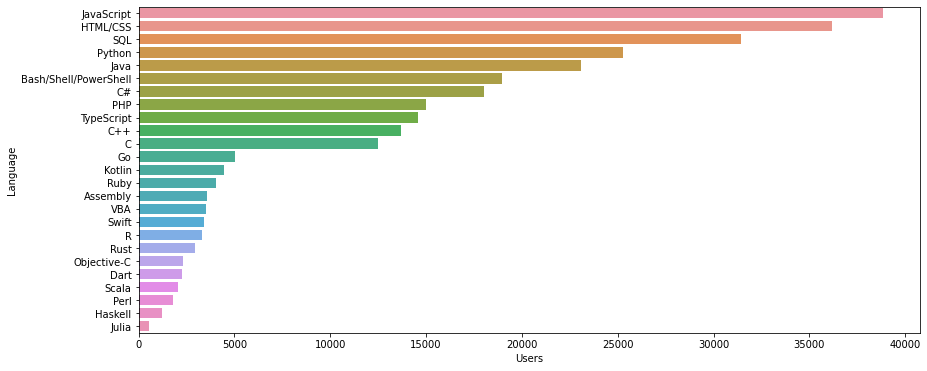

In [8]:
plt.figure(figsize=(14,6))
sns.barplot(data = sorted_lang_worked_cleaned_df , y = 'Language',x = 'Users',)

JavaScript is leading with HTML/CSS. Mostly due to Web development.
SQL is most popular leading Database query languge, then python the languge of ease followed by Java, the backbone of backend development

Some of the respondents were students, part-time developers & programming enthusiasts. Some may have just started from college & haven’t established an industry mindset.
Before we come to conclusion, we should see filter it for professionals.

Let's filter the data for respondents who are full time developers & have experience more than 1 year.

In [9]:
dev_df = pd.DataFrame(lang_worked_df.query("Employment == 'Employed full-time' and YearsCodePro > '1' and MainBranch == 'I am a developer by profession' "))

dev_df_cleaned_df = s.clean_series(dev_df, "LanguageWorkedWith", "Language", "Developers")
sorted_dev_cleaned_df = dev_df_cleaned_df.sort_values("Developers", ascending=False)

sorted_dev_cleaned_df

,Language,Developers
0,JavaScript,22469
2,HTML/CSS,19535
7,SQL,18106
6,Python,12241
3,Java,12184
9,Bash/Shell/PowerShell,11154
4,C#,10843
11,TypeScript,9787
5,PHP,7607
12,C++,5987


Let's visualize language for developers

<AxesSubplot:xlabel='Developers', ylabel='Language'>

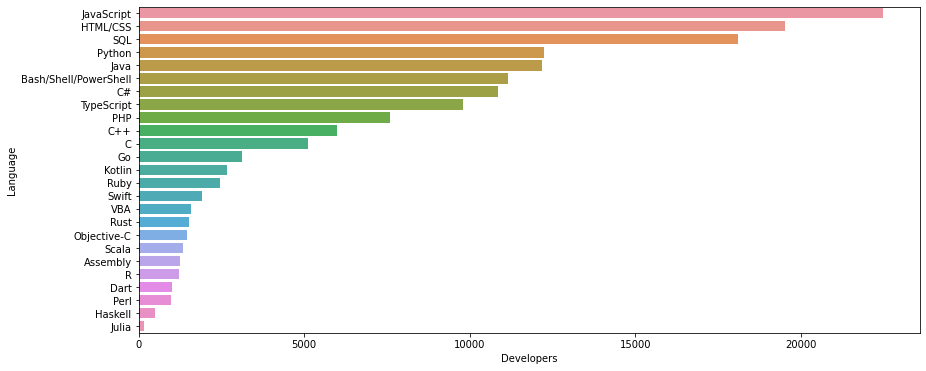

In [10]:
plt.figure(figsize=(14,6))
sns.barplot(data = sorted_dev_cleaned_df , y = 'Language',x = 'Developers',)

Trends for professionals look similar, JavaScript, HTML/CSS, SQL, Python followed by Java.

Then the question aries, Does it vary for big organizations ?

Let's filter data for Organizations with Employees more the 100

In [11]:
org_small_df = pd.DataFrame(dev_df.query("OrgSize not in ['20 to 99 employees', 'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees']"))
org_small_df_cleaned_df = s.clean_series(org_small_df, "LanguageWorkedWith", "Language", "Developers")
sorted_org_small_df_cleaned_df = org_small_df_cleaned_df.sort_values("Developers", ascending=False)


Let's visualize for large organizations

<AxesSubplot:xlabel='Developers', ylabel='Language'>

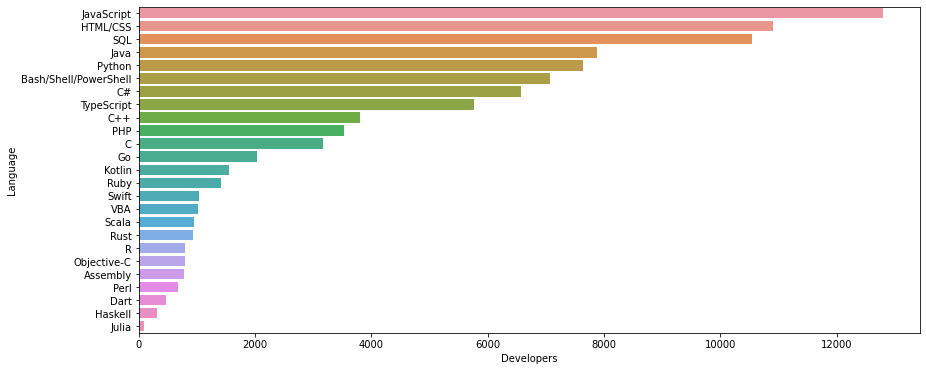

In [12]:
plt.figure(figsize=(14,6))
sns.barplot(data = sorted_org_small_df_cleaned_df , y = 'Language',x = 'Developers',)

Overall trends look similar as earlier except that the old school PHP is discouraged by professionals & Java holds the ground stronger in the core industry.


### Conclusion 

Overall - JavaScript, HTML/CSS, SQL, Java and Python were most used programming languages and were in high demand.



### Q.2 How is Language satisfaction among developers ?

In this section, we will understand how satisfied are developers with thier current usage of Languages. Do they want to migrate to another tech stack or perefer continuing with the same ?







Let's get data where respondents have shared desired languages for next year. We are gonna compare LanguageWorkedWith & LanguageDesireNextYear columns to see declines & gains in fanbase of particular language.

In [13]:
lang_desired_df = dev_df[dev_df['LanguageDesireNextYear'].notna()]

lang_desired_cleaned_df = s.clean_series(lang_desired_df, "LanguageDesireNextYear", "Language", "Developers")
sorted_lang_desired_cleaned_df = lang_desired_cleaned_df.sort_values("Developers", ascending=False)

lang_worked_desired_cleaned_df = s.clean_series(lang_desired_df, "LanguageWorkedWith", "Language", "Developers")
sorted_lang_worked_desired_cleaned_df = lang_worked_desired_cleaned_df.sort_values("Developers", ascending=False)

dic1 = sorted_lang_desired_cleaned_df.set_index('Language')['Developers'].to_dict()
dic2 = sorted_lang_worked_desired_cleaned_df.set_index('Language')['Developers'].to_dict()

dic1, dic2

desire_df = pd.DataFrame(
    [l, 100 * (dic1[l] - dic2[l])/(lang_desired_df.shape[0])] for l in s.languages
)

desire_df

,0,1
0,Assembly,-1.102458
1,Bash/Shell/PowerShell,-13.647551
2,C,-7.754290
3,C#,-7.309261
4,C++,-4.578403
5,Dart,4.807660
6,Go,15.518695
7,Haskell,3.583831
8,HTML/CSS,-24.176528
9,Java,-15.943495


Let's visualize the comparasion

<AxesSubplot:xlabel='% Developers who want to keep using it', ylabel='Language'>

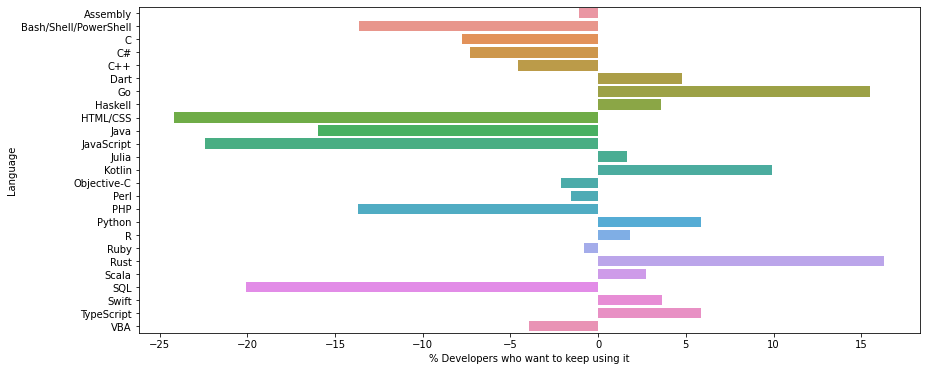

In [14]:
plt.figure(figsize=(14,6))
plt.xlabel("Ddf")
plt.ylabel("Values")
ax = sns.barplot(data = desire_df , y = 0,x = 1)
ax.set(ylabel='Language', xlabel='% Developers who want to keep using it')
ax

Major satisfaction declines - JavaScript, HTML/CSS, PHP, Java, Shell scripting, SQL

Major satisfaction gains - Go, Kotlin, Rust, Python, TypeScript, Dart



### Conclusion 

Everybody wants to work with the new cool kid in the town. SQL is losing fan base, obviously to NoSQL. 

Python is rising as a scripting language, Rust as system one, Templating as HTML replacement.

JavaScript is mostly losing it to TypeScript & Dart

Java developers are probaly looking for Kotlin & Go as alternatives

### Q.3 Which all languages are rising as an alternative to most popular ones ?

In previous section, we saw that many developers want to try out newer languages. May be due to developer friendliness while writing code. Many of languages had obviosus & popular replacements. In this section we will focus on understandng alternatives to Java & JavaScript, Backbones of web development.


First, let's focus on Java & filter out developers working with Java. We are gonna find out how many developers do not wish to coontinue with Java.

In [15]:
# lang_desired_df = dev_df[dev_df['LanguageDesireNextYear'].notna()]
java_df = lang_desired_df[ lang_desired_df['LanguageWorkedWith'].str.contains("Java(?!Script)")]
java_df.head()[s.desired_columns]

java_desired_no_java_df = java_df[ ~ java_df['LanguageDesireNextYear'].str.contains("Java(?!Script)")]
java_desired_no_java_df.head(10)[s.desired_columns]

java_desired_no_java_df.shape[0], java_df.shape[0], java_desired_no_java_df.shape[0]/java_df.shape[0]



(5917, 11519, 0.5136730618977342)

Let's visualize 

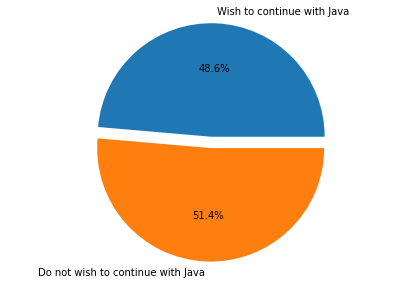

In [16]:
java_not_desired_perc = java_desired_no_java_df.shape[0]/java_df.shape[0]

labels = ['Wish to continue with Java', 'Do not wish to continue with Java']
sizes = [1-java_not_desired_perc, java_not_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()



~51% of developers do not wish to continue with Java

What do see see as alternatives ?

Let's find out how many Java developers want to work with Kotlin ?

In [17]:
java_desired_kotlin_df = java_df[ java_df['LanguageDesireNextYear'].str.contains("Kotlin")]
java_desired_kotlin_df.shape[0], java_df.shape[0], java_desired_kotlin_df.shape[0]/java_df.shape[0]


(3788, 11519, 0.3288479902769338)

Let's visualize 

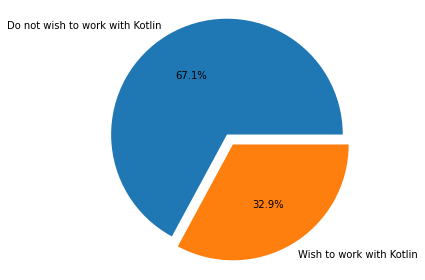

In [18]:
kotlin_desired_perc = java_desired_kotlin_df.shape[0]/java_df.shape[0]

labels = ['Do not wish to work with Kotlin', 'Wish to work with Kotlin']
sizes = [1-kotlin_desired_perc, kotlin_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

~ 33% of Java Developers want to work with Kotlin. Kotlin is known to be a superset of Java.

Let's find out how many Java developers want to work with Go ?

In [19]:
java_desired_go_df = java_df[ java_df['LanguageDesireNextYear'].str.contains("Go")]
java_desired_go_df.shape[0], java_df.shape[0], java_desired_go_df.shape[0]/java_df.shape[0]

(3254, 11519, 0.28248979946175884)

Let's visualize 

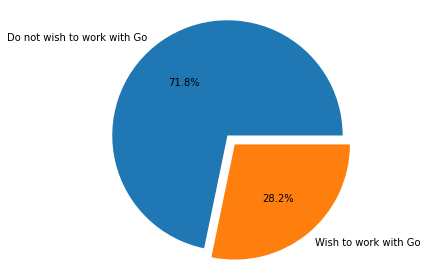

In [20]:
go_desired_perc = java_desired_go_df.shape[0]/java_df.shape[0]

labels = ['Do not wish to work with Go', 'Wish to work with Go']
sizes = [1-go_desired_perc, go_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

~ 28% of Java Developers want to work with Go. Go claims to be faster than majority of server side languages and from Google.


Now let's focus on JavaScript. How many developers want to continue with JavaScript ?

In [21]:
# lang_desired_df = dev_df[dev_df['LanguageDesireNextYear'].notna()]
js_df = lang_desired_df[ lang_desired_df['LanguageWorkedWith'].str.contains("JavaScript")]
js_df.head()[s.desired_columns]

js_desired_no_js_df = js_df[ ~ js_df['LanguageDesireNextYear'].str.contains("JavaScript")]
js_desired_no_js_df.head(10)[s.desired_columns]

js_desired_no_js_df.shape[0], js_df.shape[0], js_desired_no_js_df.shape[0]/js_df.shape[0]


(7816, 21140, 0.3697256385998108)

Let's visualize 

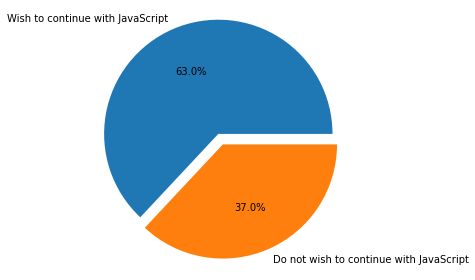

In [22]:
js_not_desired_perc = js_desired_no_js_df.shape[0]/js_df.shape[0]

labels = ['Wish to continue with JavaScript', 'Do not wish to continue with JavaScript']
sizes = [1-js_not_desired_perc, js_not_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

~37% of JavaScript developers do not wish to continue with JavaScript

What do see see as alternatives ?

TypeScript as an alternative to JavaScript ? Let's find out How many JavaScript developers want to work with TypeScript.

In [23]:
js_desired_ts_df = js_df[ js_df['LanguageDesireNextYear'].str.contains("TypeScript")]
js_desired_ts_df.shape[0], js_df.shape[0], js_desired_ts_df.shape[0]/js_df.shape[0]


(9843, 21140, 0.4656102175969726)

Let's visuaize

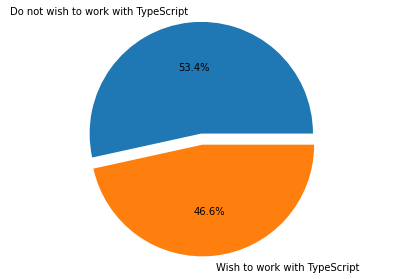

In [24]:
ts_desired_perc = js_desired_ts_df.shape[0]/js_df.shape[0]

labels = ['Do not wish to work with TypeScript', 'Wish to work with TypeScript']
sizes = [1-ts_desired_perc, ts_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

~ 47% of JavaScript developer want to try out TypeScript. TypeScript add type-checking to JavaScript & is a superset of JavaScript.

Dart as an alternative to JavaScript ? Let's find out How many JavaScript developers want to work with Dart.

In [25]:
js_desired_dart_df = js_df[ js_df['LanguageDesireNextYear'].str.contains("Dart")]
js_desired_dart_df.shape[0], js_df.shape[0], js_desired_dart_df.shape[0]/js_df.shape[0]


(1834, 21140, 0.08675496688741721)

Let's visualize 

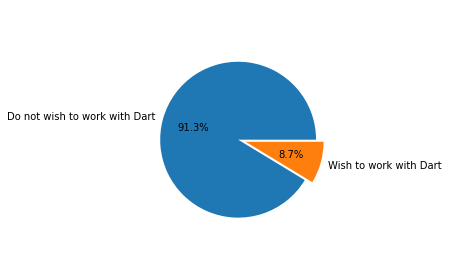

In [26]:
dart_desired_perc = js_desired_dart_df.shape[0]/js_df.shape[0]

labels = ['Do not wish to work with Dart', 'Wish to work with Dart']
sizes = [1-dart_desired_perc, dart_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

~ 9% of JavaScript developers want to try out Dart. Dart is mainstream language while building apps with Angular & Flutter frameworks
 

### Conclusion 

Majority of Java developers do not wish to continue with Java & look forward to Kotlin & Go as a replacement.

While majority of JavaScript developers want to continue with JavaScript but want to try out TypeScript or dart as well if given an option.